In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lecutra de set de datos

In [65]:
url1 = "https://raw.githubusercontent.com/daramireh/simonBolivarCienciaDatos/refs/heads/main/world_cup_women.csv"
url2 = "https://raw.githubusercontent.com/daramireh/simonBolivarCienciaDatos/refs/heads/main/matches_1991_2023.csv"

df_world_cup = pd.read_csv(url1)
df_matches = pd.read_csv(url2)

 1. Análisis donde identifique las variables del conjunto de datos mostrando los valores nulos, duplicados y el tipo de variable.


* Dataset world_cup_women

In [66]:
# Contar valores nulos por columna
print("\nValores nulos por columna:")
print(df_world_cup.isnull().sum())


Valores nulos por columna:
Year             0
Host             0
Teams            0
Champion         1
Runner-Up        1
TopScorrer       0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64


In [67]:
# Contar valores duplicados
print("\nCantidad de filas duplicadas:")
print(df_world_cup.duplicated().sum())


Cantidad de filas duplicadas:
0


In [68]:
# Mostrar el tipo de dato de cada columna
print("\nTipos de datos de cada columna:")
print(df_world_cup.dtypes)


Tipos de datos de cada columna:
Year              int64
Host             object
Teams             int64
Champion         object
Runner-Up        object
TopScorrer       object
Attendance        int64
AttendanceAvg     int64
Matches           int64
dtype: object


*  Dataset matches_1991_2023

In [69]:
# Contar valores nulos por columna
print("\nValores nulos por columna:")
print(df_matches.isnull().sum())


Valores nulos por columna:
home_team                            0
away_team                            0
home_score                           0
home_xg                            232
home_penalty                       337
away_score                           0
away_xg                            232
away_penalty                       337
home_manager                       180
home_captain                       180
away_manager                       180
away_captain                       180
Attendance                           0
Venue                                0
Officials                            3
Round                                0
Date                                 0
Score                                0
Referee                              7
Notes                              328
Host                                 0
Year                                 0
home_goal                           96
away_goal                          148
home_goal_long                      

In [70]:
# Contar valores duplicados
print("\nCantidad de filas duplicadas:")
print(df_matches.duplicated().sum())


Cantidad de filas duplicadas:
0


In [71]:
# Mostrar el tipo de dato de cada columna
print("\nTipos de datos de cada columna:")
print(df_matches.dtypes)


Tipos de datos de cada columna:
home_team                           object
away_team                           object
home_score                           int64
home_xg                            float64
home_penalty                       float64
away_score                           int64
away_xg                            float64
away_penalty                       float64
home_manager                        object
home_captain                        object
away_manager                        object
away_captain                        object
Attendance                           int64
Venue                               object
Officials                           object
Round                               object
Date                                object
Score                               object
Referee                             object
Notes                               object
Host                                object
Year                                 int64
home_goal            

2. Validación cruzada entre las tablas, identifique los campos que relacionan las tablas y si existen datos faltantes en dichos campos.

Se relacionan por el año y el host (sin embargo para tener una mejor integridad de los datos se deben relacionar solo por el año en este caso, ya que las columnas de tipo string no son recomendables para cruzar tablas), en ninguna de las tablas hay datos faltantes para estas columnas.

3. Transforme las tablas para entregar UNA ÚNICA TABLA que muestre

 I.
 Año, Host, Equipo, Partidos Jugados, Goles Totales marcados, Promedio de Goles marcados, Goles Totales recibidos, promedio de
 goles recibidos, partidos totales ganados, partidos totales perdidos y partidos totales empatados, promedio de asistencia por
 equipo.

In [72]:
def process_world_cup_data(df1, df2):
    merged_df = df1.merge(df2, on=['Year', 'Host'], how='left')

    # Obtener lista de equipos
    teams = pd.concat([merged_df['home_team'], merged_df['away_team']]).unique()

    # Crear diccionario para almacenar los datos por equipo y año
    team_stats = {}

    # Recorrer partidos y calcular estadísticas
    for _, row in merged_df.iterrows():
        home_team, away_team = row['home_team'], row['away_team']
        home_goals, away_goals = row['home_score'], row['away_score']
        attendance = row['Attendance_x']
        year, host = row['Year'], row['Host']

        for team in [home_team, away_team]:
            key = (team, year)
            if key not in team_stats:
                team_stats[key] = {'Team': team, 'Year': year, 'Host': host, 'Games Played': 0, 'Goals Scored': 0,
                                   'Goals Conceded': 0, 'Wins': 0, 'Losses': 0, 'Draws': 0, 'Attendance Avg': 0}

            team_stats[key]['Games Played'] += 1
            team_stats[key]['Attendance Avg'] += attendance

        # Actualizar goles anotados y recibidos
        team_stats[(home_team, year)]['Goals Scored'] += home_goals
        team_stats[(away_team, year)]['Goals Scored'] += away_goals
        team_stats[(home_team, year)]['Goals Conceded'] += away_goals
        team_stats[(away_team, year)]['Goals Conceded'] += home_goals

        # Determinar resultados de los partidos
        if home_goals > away_goals:
            team_stats[(home_team, year)]['Wins'] += 1
            team_stats[(away_team, year)]['Losses'] += 1
        elif home_goals < away_goals:
            team_stats[(away_team, year)]['Wins'] += 1
            team_stats[(home_team, year)]['Losses'] += 1
        else:
            team_stats[(home_team, year)]['Draws'] += 1
            team_stats[(away_team, year)]['Draws'] += 1

    # Convertir diccionario en DataFrame
    final_df = pd.DataFrame.from_dict(team_stats, orient='index')

    # Calcular promedios
    final_df['Goals Scored Avg'] = final_df['Goals Scored'] / final_df['Games Played']
    final_df['Goals Conceded Avg'] = final_df['Goals Conceded'] / final_df['Games Played']
    final_df['Attendance Avg'] /= final_df['Games Played']

    return final_df.reset_index(drop=True)

In [73]:
nueva_tabla = process_world_cup_data(df_matches, df_world_cup)

## Estructura de nueva tabla

In [74]:
nueva_tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                168 non-null    object 
 1   Year                168 non-null    int64  
 2   Host                168 non-null    object 
 3   Games Played        168 non-null    int64  
 4   Goals Scored        168 non-null    int64  
 5   Goals Conceded      168 non-null    int64  
 6   Wins                168 non-null    int64  
 7   Losses              168 non-null    int64  
 8   Draws               168 non-null    int64  
 9   Attendance Avg      168 non-null    float64
 10  Goals Scored Avg    168 non-null    float64
 11  Goals Conceded Avg  168 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 15.9+ KB


### Guardar archivo para luego importarlo en PowerBI

In [75]:
nueva_tabla.to_csv("Mundiales_Femeninos.csv", index=False, encoding="utf-8")

II.
 Con esta tabla identifique el equipo con más partidos ganados, el equipo con más partidos empatados y el equipo con más
partidos perdidos.

In [76]:
# Agrupar por equipo para obtener los totales históricos
historical_stats = nueva_tabla.groupby("Team").sum(numeric_only=True)

# Calcular el número de Copas del Mundo jugadas por cada equipo
world_cups_played = nueva_tabla.groupby("Team")["Year"].nunique()

historical_stats["World Cups Played"] = world_cups_played

# Identificar los equipos con más victorias, empates y derrotas
team_most_wins = historical_stats["Wins"].idxmax()
team_most_draws = historical_stats["Draws"].idxmax()
team_most_losses = historical_stats["Losses"].idxmax()

# Mostrar resultados
print(f"Equipo con más victorias: {team_most_wins} ({historical_stats.loc[team_most_wins, 'Wins']} victorias en {historical_stats.loc[team_most_wins, 'World Cups Played']} Mundiales)")
print(f"Equipo con más empates: {team_most_draws} ({historical_stats.loc[team_most_draws, 'Draws']} empates en {historical_stats.loc[team_most_draws, 'World Cups Played']} Mundiales)")
print(f"Equipo con más derrotas: {team_most_losses} ({historical_stats.loc[team_most_losses, 'Losses']} derrotas en {historical_stats.loc[team_most_losses, 'World Cups Played']} Mundiales)")

Equipo con más victorias: United States (41 victorias en 9 Mundiales)
Equipo con más empates: United States (9 empates en 9 Mundiales)
Equipo con más derrotas: Nigeria (19 derrotas en 9 Mundiales)


III. Identifique el equipo con mayor promedio de goles anotados y el equipo con mayor promedio de goles recibidos.

In [77]:
# Calcular promedios generales
historical_stats['Goals Scored Avg'] = historical_stats['Goals Scored'] / historical_stats['Games Played']
historical_stats['Goals Conceded Avg'] = historical_stats['Goals Conceded'] / historical_stats['Games Played']

# Equipo con mayor promedio de goles anotados
team_highest_scoring = historical_stats['Goals Scored Avg'].idxmax()
highest_scoring_avg = historical_stats.loc[team_highest_scoring, 'Goals Scored Avg']

# Equipo con mayor promedio de goles recibidos
team_most_conceded = historical_stats['Goals Conceded Avg'].idxmax()
most_conceded_avg = historical_stats.loc[team_most_conceded, 'Goals Conceded Avg']

# Mostrar resultados
print(f"Equipo con mayor promedio de goles anotados: {team_highest_scoring} ({highest_scoring_avg:.2f} goles por partido)")
print(f"Equipo con mayor promedio de goles recibidos: {team_most_conceded} ({most_conceded_avg:.2f} goles por partido)")

Equipo con mayor promedio de goles anotados: Germany (2.72 goles por partido)
Equipo con mayor promedio de goles recibidos: Ecuador (5.67 goles por partido)


IV. Compare los resultados de los puntos I y II con el número de mundiales que ha jugado cada equipo y concluya, ¿Realmente son
los mejores o los peores?

In [78]:
# Mostrar resultados
print(f"Equipo con más victorias: {team_most_wins} ({historical_stats.loc[team_most_wins, 'Wins']} victorias en {historical_stats.loc[team_most_wins, 'World Cups Played']} Mundiales)")
print(f"Equipo con más empates: {team_most_draws} ({historical_stats.loc[team_most_draws, 'Draws']} empates en {historical_stats.loc[team_most_draws, 'World Cups Played']} Mundiales)")
print(f"Equipo con más derrotas: {team_most_losses} ({historical_stats.loc[team_most_losses, 'Losses']} derrotas en {historical_stats.loc[team_most_losses, 'World Cups Played']} Mundiales)")

print(f"Equipo con mayor promedio de goles anotados: {team_highest_scoring} ({highest_scoring_avg:.2f} goles por partido)")
print(f"Equipo con mayor promedio de goles recibidos: {team_most_conceded} ({most_conceded_avg:.2f} goles recibidos por partido)")

# Conclusión basada en la cantidad de Mundiales jugados
print(f"{team_most_wins} ha sido altamente efectivo en las ediciones en las que ha participado.")
print(f"{team_most_losses} ha tenido un bajo rendimiento en los Mundiales en los que ha jugado.")

if team_most_losses == team_most_conceded:
    print(f"{team_most_losses} no solo ha perdido más partidos, sino que también ha recibido más goles en promedio, indicando una debilidad defensiva.")
else:
    print(f"{team_most_losses} ha perdido más partidos, pero {team_most_conceded} ha sido el equipo más vulnerable defensivamente.")

if team_most_wins == team_highest_scoring:
    print(f"{team_most_wins} no solo ha ganado más partidos, sino que también ha sido el equipo más ofensivo.")
else:
    print(f"{team_most_wins} ha ganado más partidos, pero {team_highest_scoring} ha sido el equipo más efectivo en ataque.")


Equipo con más victorias: United States (41 victorias en 9 Mundiales)
Equipo con más empates: United States (9 empates en 9 Mundiales)
Equipo con más derrotas: Nigeria (19 derrotas en 9 Mundiales)
Equipo con mayor promedio de goles anotados: Germany (2.72 goles por partido)
Equipo con mayor promedio de goles recibidos: Ecuador (5.67 goles recibidos por partido)
United States ha sido altamente efectivo en las ediciones en las que ha participado.
Nigeria ha tenido un bajo rendimiento en los Mundiales en los que ha jugado.
Nigeria ha perdido más partidos, pero Ecuador ha sido el equipo más vulnerable defensivamente.
United States ha ganado más partidos, pero Germany ha sido el equipo más efectivo en ataque.


4. Complete la tabla world_cup_women con los valores del promedio de goles de cada edición y el número de partidos que
terminaron en empate.

In [79]:
# Calcular el promedio de goles por edición
goals_per_edition = nueva_tabla.groupby("Year")["Goals Scored"].sum() / nueva_tabla.groupby("Year")["Games Played"].sum() * 2

# Contar el número total de empates por edición
draws_per_edition = nueva_tabla.groupby("Year")["Draws"].sum()

# Añadir los valores a la tabla world_cup_women
df_world_cup["Goals Avg"] = df_world_cup["Year"].map(goals_per_edition)
df_world_cup["Draws"] = (df_world_cup["Year"].map(draws_per_edition).fillna(0) / 2).astype(int)

# Mostrar la tabla actualizada
df_world_cup

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches,Goals Avg,Draws
0,2023,"Australia, New Zealand",32,NaN,NaN,Hinata Miyazawa - 5,1976274,30879,64,2.562500,13
1,2019,France,24,United States,Netherlands,"Alex Morgan, Megan Rapinoe... - 6",1095118,21902,52,2.807692,4
2,2015,Canada,24,United States,Japan,"Célia Šašić, Carli Lloyd - 6",1353486,26029,52,2.807692,11
3,2011,Germany,16,Japan,United States,Homare Sawa - 5,248107,31013,32,2.687500,6
4,2007,China PR,16,Germany,Brazil,Marta - 7,1176955,36780,32,3.468750,6
5,2003,United States,16,Germany,Sweden,Birgit Prinz - 7,656789,20525,32,3.281250,3
6,1999,United States,16,United States,China PR,"Sun Wen, Sissi - 7",1214215,37944,32,3.812500,6
7,1995,Sweden,12,Norway,Germany,Ann Kristin Aarønes - 6,112294,4319,26,3.807692,3
8,1991,China PR,12,United States,Norway,Michelle Akers - 10,515000,19808,26,3.807692,1


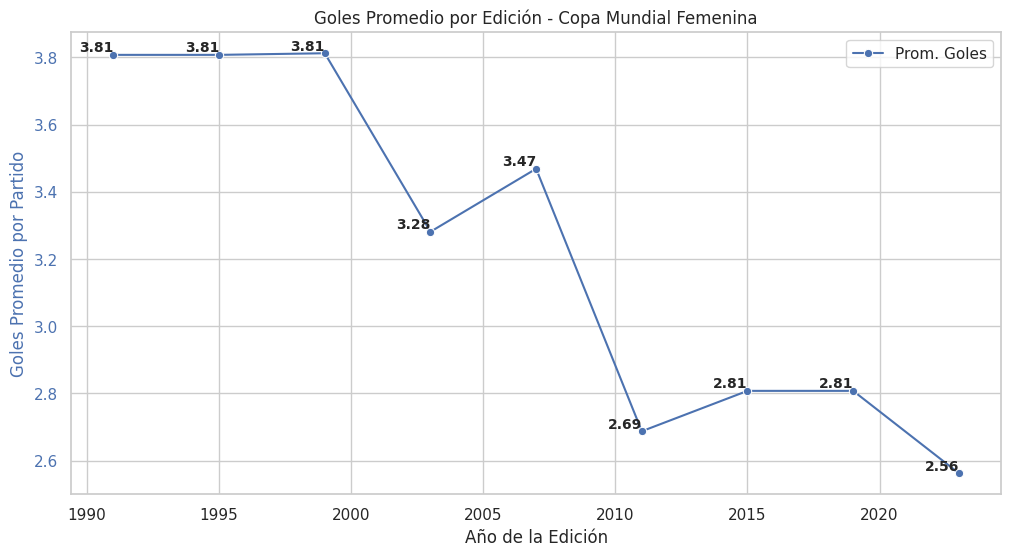

In [80]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de líneas para el promedio de goles por edición
sns.lineplot(data=df_world_cup, x="Year", y="Goals Avg", marker="o", label="Prom. Goles", ax=ax1, color="b")
ax1.set_ylabel("Goles Promedio por Partido", color="b")
ax1.set_xlabel("Año de la Edición")
ax1.tick_params(axis="y", labelcolor="b")

# Agregar etiquetas en cada punto
for x, y in zip(df_world_cup["Year"], df_world_cup["Goals Avg"]):
    plt.text(x, y, f"{y:,.2f}", ha='right', va='bottom', fontsize=10, fontweight="bold")


plt.title("Goles Promedio por Edición - Copa Mundial Femenina")
plt.show()

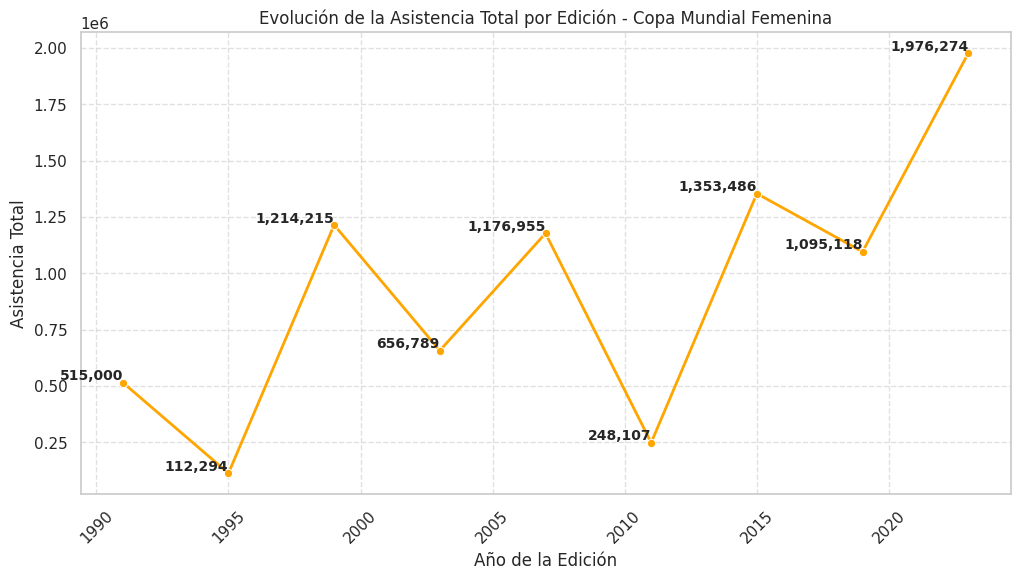

In [81]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_world_cup, x="Year", y="Attendance", marker="o", color="orange", linewidth=2)

# Agregar etiquetas en cada punto
for x, y in zip(df_world_cup["Year"], df_world_cup["Attendance"]):
    plt.text(x, y, f"{y:,.0f}", ha='right', va='bottom', fontsize=10, fontweight="bold")

plt.xlabel("Año de la Edición")
plt.ylabel("Asistencia Total")
plt.title("Evolución de la Asistencia Total por Edición - Copa Mundial Femenina")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()